In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
df=pd.read_csv("/content/ElectricCarData_Norm.csv")

In [3]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [4]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [15]:
df.describe()

,Accel,TopSpeed,Range,Efficiency,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [5]:
a=np.arange(1,104)

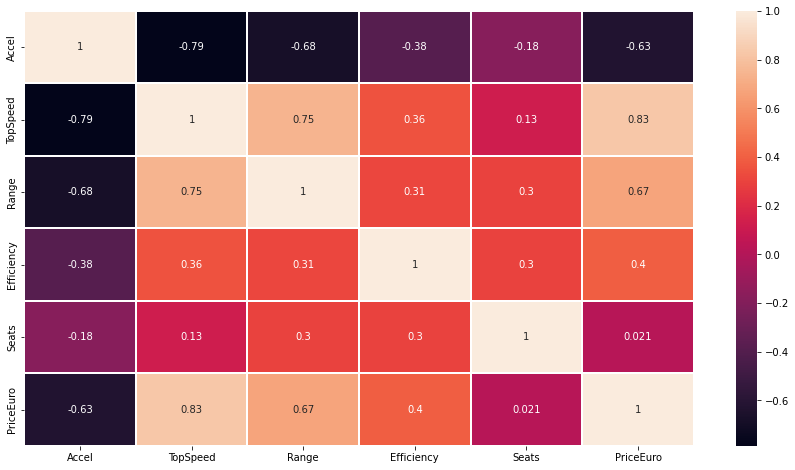

In [7]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

Text(0, 0.5, 'Frequency')

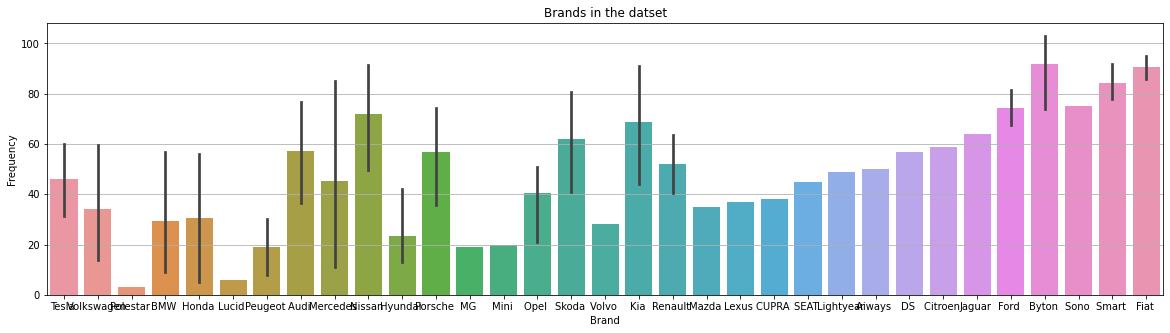

In [8]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y=a,data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')

Text(0, 0.5, 'Top Speed')

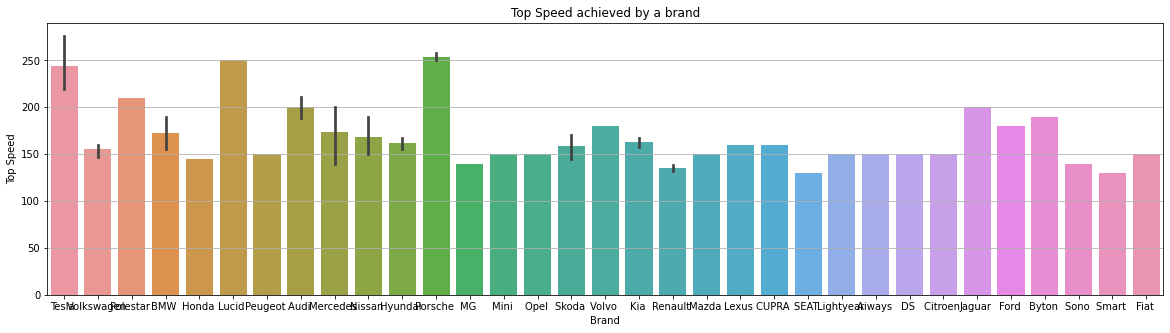

In [10]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed',data=df)
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')

Text(0, 0.5, 'Range')

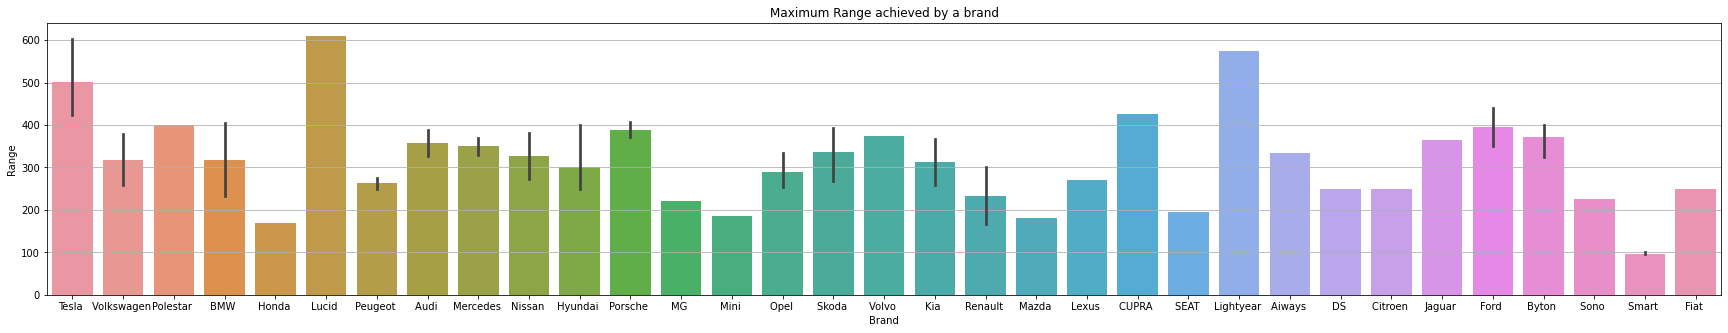

In [14]:
ax= plt.figure(figsize=(30,5))
sns.barplot(x='Brand',y='Range',data=df)
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')

Text(0, 0.5, 'Efficiency')

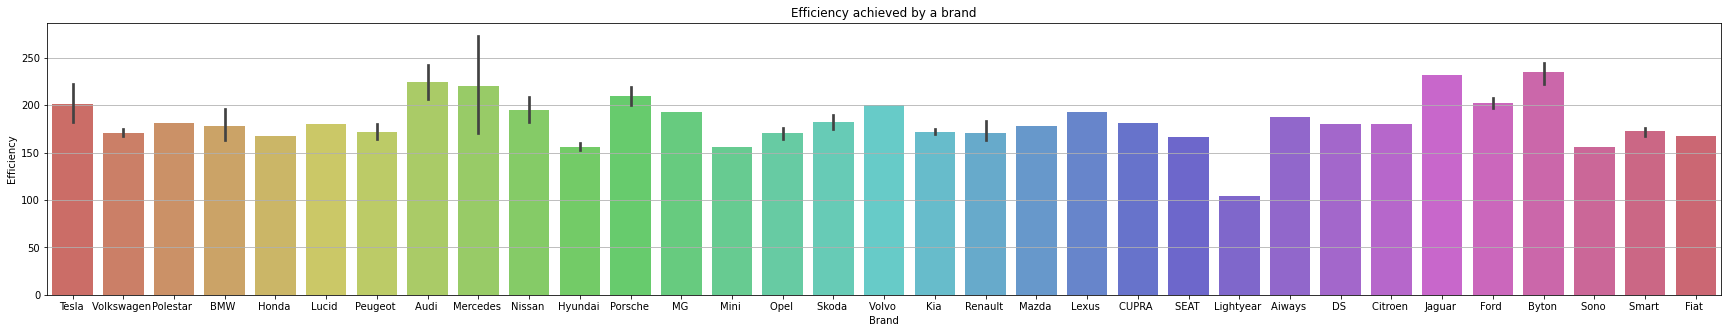

In [19]:
ax= plt.figure(figsize=(30,5))
sns.barplot(x='Brand',y='Efficiency',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')

Text(0, 0.5, 'Frequency')

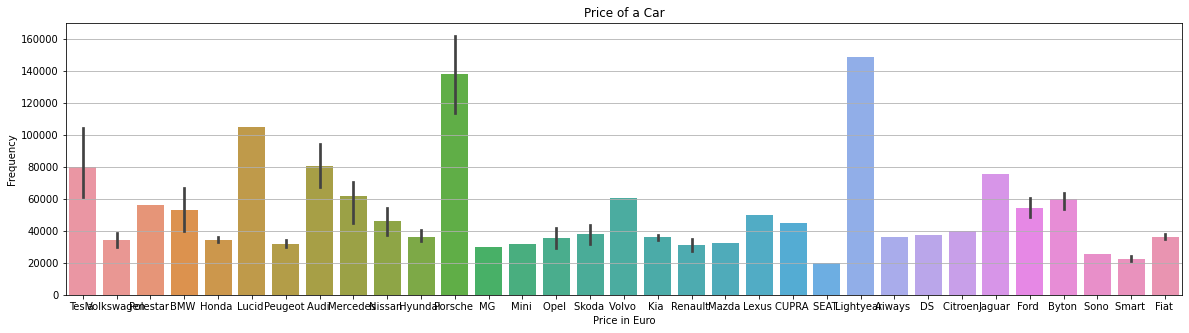

In [21]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='PriceEuro',data=df)
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')

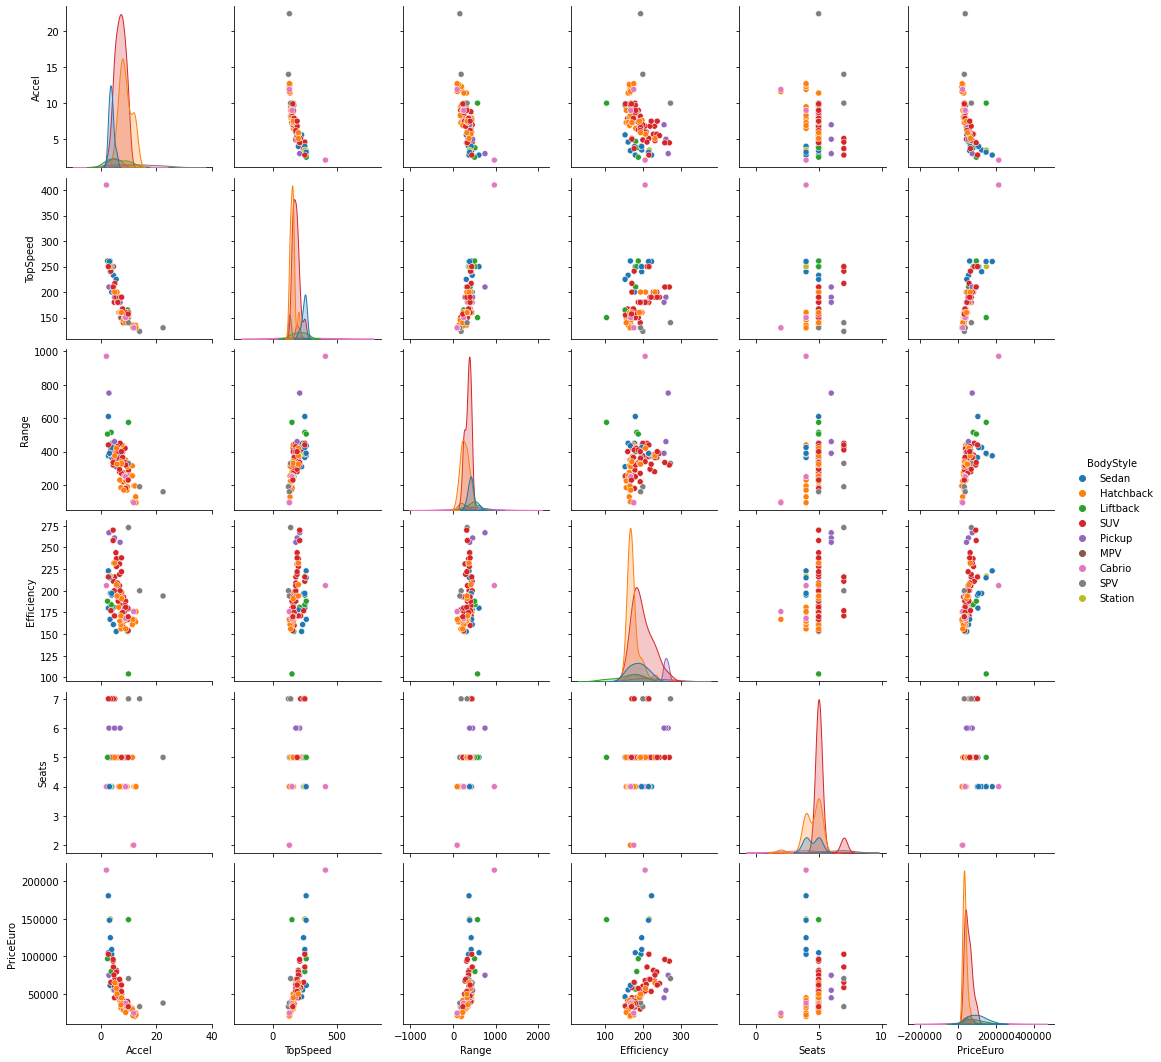

In [16]:
sns.pairplot(df,hue='BodyStyle')

In [27]:
#Price and Brand
fig = px.box(df, x ='PriceEuro',y ='Brand' , color='Brand', points='all', hover_data=['Model'] ,
           height=1000, width= 900, orientation='h', title='Price and Brand' , template='ggplot2' ,
            labels=dict(PriceEuro='Price (€)'))
fig.show()

In [28]:
#Speed and Acceleration
fig = px.scatter(df,x = 'TopSpeed',y = 'Accel', color = 'Brand', hover_data=['Model'] ,
           opacity=0.8 , title='Acceleration and Top Speed' , height=650 , width=900 , template='ggplot2' ,
                labels=dict(AccelSec='Acceleration (Sec)', TopSpeed_KmH='Top Speed (Km/H)'))

fig.update_traces(marker={'size': 8}) # adjusting the markers size
fig.show()

In [29]:
#Price and Range
fig = px.histogram(df, x='Range', y='PriceEuro', color='Brand', barmode='group', histfunc='avg', 
                   height=400 , width=1100 , nbins=10 , template='ggplot2' , title='Average Price and Range' ,
                    labels=dict(PriceEuro='Price (€)', Range_Km='Range (Km)'))

fig.show()

In [30]:
px.box(df,x='RapidCharge',y = 'PriceEuro',color = 'RapidCharge',points='all')

In [31]:
px.scatter(df,x = 'Brand',y = 'Range',size='Seats',color = 'Brand',hover_data=['RapidCharge','PriceEuro'])

# **Clustering**

In [33]:
#Acceleration and Top Speed
km = df.iloc[:,[2,3]]

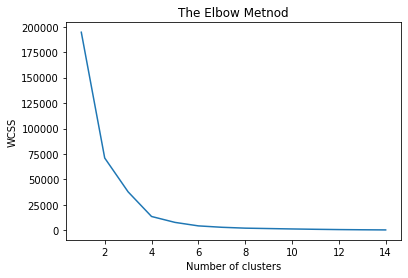

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(km)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(km)
km["label"] = y_kmeans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



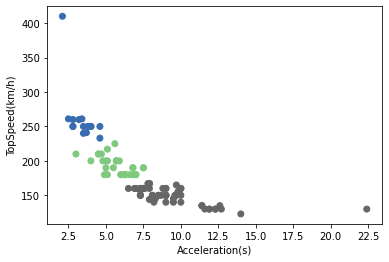

In [38]:
plt.scatter(km['Accel'], km['TopSpeed'], c=km["label"],cmap='Accent')
plt.xlabel('Acceleration(s)')
plt.ylabel('TopSpeed(km/h)')
plt.show()

In [39]:
#Range vs Efficiency
km1 = df.iloc[:,[4,5]]

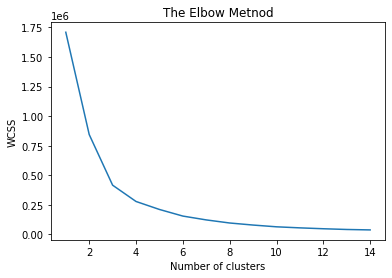

In [40]:
wcss = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(km1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(km1)
km1["label"] = y_kmeans

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



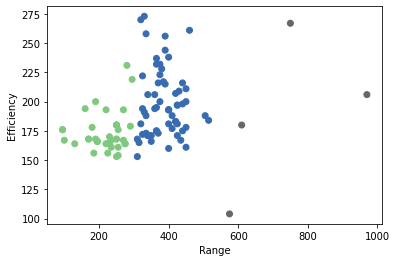

In [44]:
plt.scatter(km1['Range'], km1['Efficiency'], c=km1["label"],cmap='Accent')
plt.xlabel('Range')
plt.ylabel('Efficiency')
plt.show()

In [51]:
#Speed vs Range vs Efficiency
km2 = df.iloc[:,[3,4,5]]

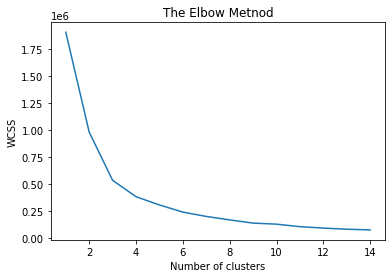

In [52]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(km2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Metnod')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(km2)
km2["label"] = y_kmeans2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
data1 = km2[km2.label==0]
data2 = km2[km2.label==1]
data3 = km2[km2.label==2]

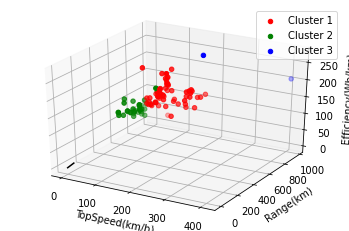

In [55]:
ax = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
ax.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
ax.scatter3D(data1.TopSpeed, data1.Range, data1.Efficiency, c='red', label = 'Cluster 1')
ax.scatter3D(data2.TopSpeed, data2.Range, data2.Efficiency, c ='green', label = 'Cluster 2')
ax.scatter3D(data3.TopSpeed, data3.Range, data3.Efficiency, c ='blue', label = 'Cluster 3')
plt.legend()
ax.set_xlabel('TopSpeed(km/h)')
ax.set_ylabel('Range(km)')
ax.set_zlabel('Efficiency(Wh/km)')
plt.show()